# Appending Data
First, import the necessary packages and load `winequality-red.csv` and `winequality-white.csv`.

In [216]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 这种方式是把matplotlib第三方库众的pyplot模块引入
# 有时候库内容很多这样可以只引入库中需要的部分
# 这个模块是要定义图形x和y轴时候要用的pandas中并没有集成这个功能
import seaborn as sns
# sns是seaborn的简称，也是用于画图的
% matplotlib inline

# load red and white wine datasets
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [126]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])
# 通过np.repeat方法制作一个列表，列表的内容是第一个参数'red',列表的长度是第二个参数red_df.shape[0]
# 其实shape[0]就是数据的行数（在p2中有讲shape）

print(color_red)
# 那么我么检查下是不是生成了一个列表

print(len(color_red))
#再检查下列表的长度

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

['red' 'red' 'red' ... 'red' 'red' 'red']
1599


Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [127]:
red_df['color'] = 'red'
red_df.head()
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

Do the same for the white dataframe and use `head()` to confirm the change.

In [128]:
white_df['color'] = color_white
white_df.head()
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

## Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [129]:
# append dataframes
wine_df = red_df.append(white_df)

# view dataframe to check for success
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


## Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [130]:
wine_df.to_csv('winequality_edited.csv', index=False)
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [131]:
wine_df.to_csv('winequality_edited.csv')
check2_df = pd.read_csv('winequality_edited.csv')
check2_df.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


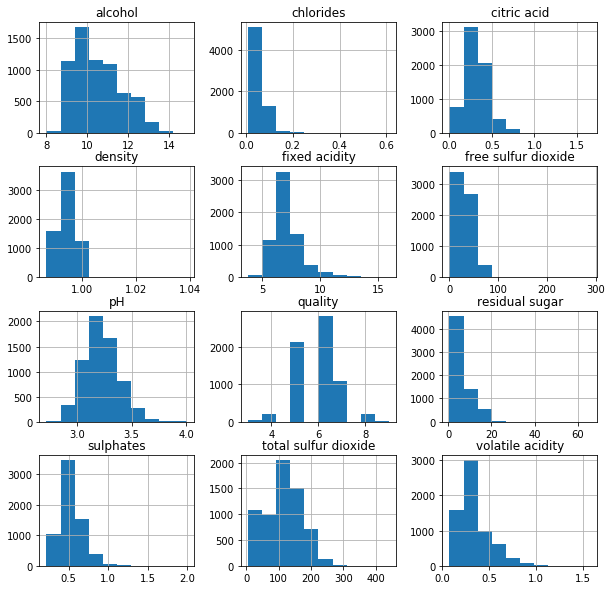

In [132]:
wine_df.hist(figsize=(10,10));

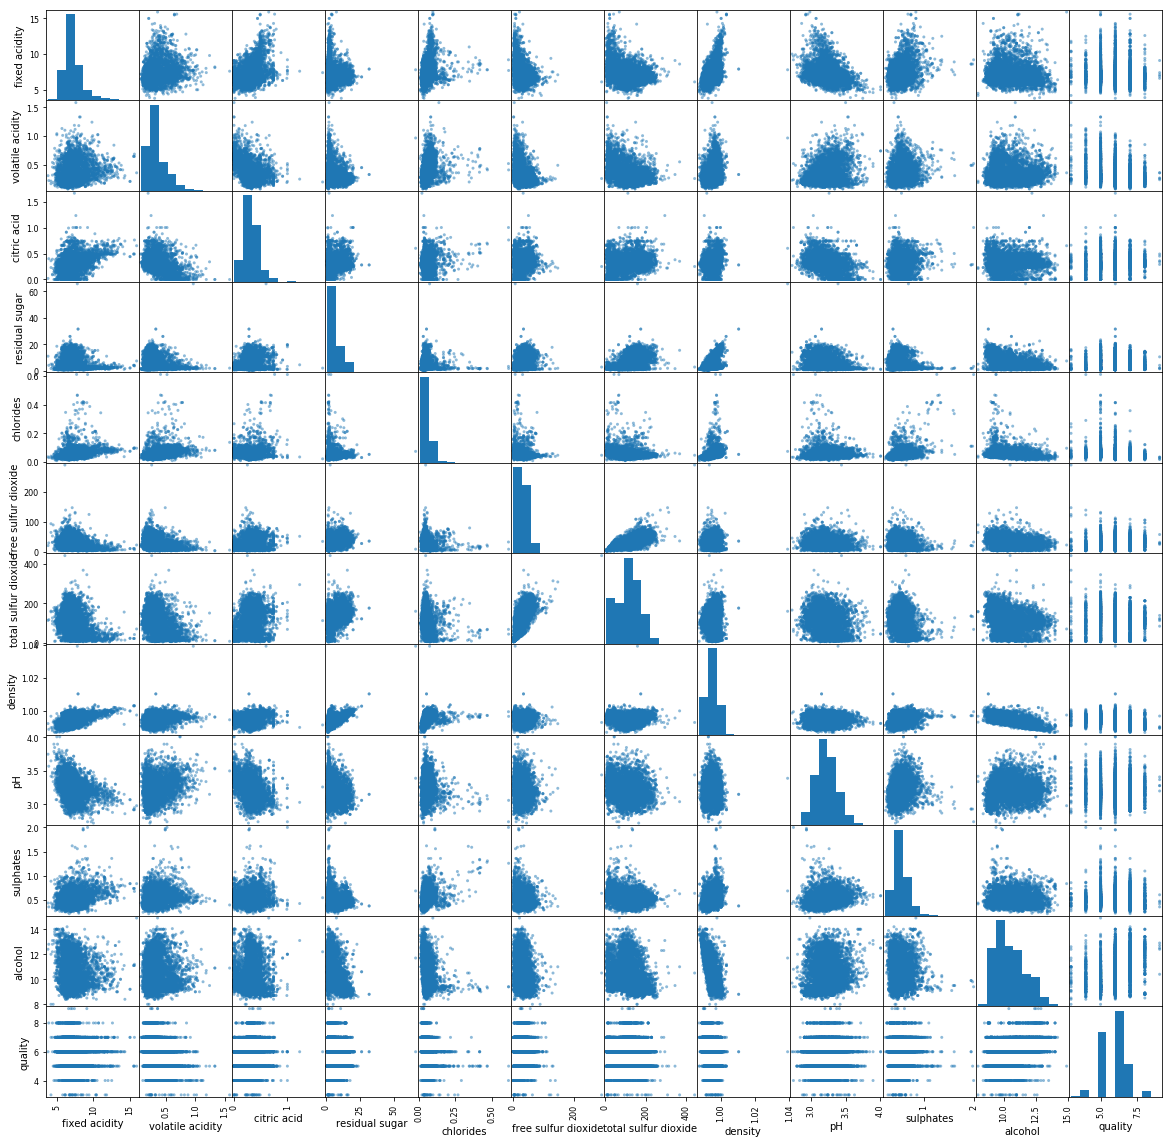

In [133]:
pd.plotting.scatter_matrix(wine_df, figsize=(20,20));

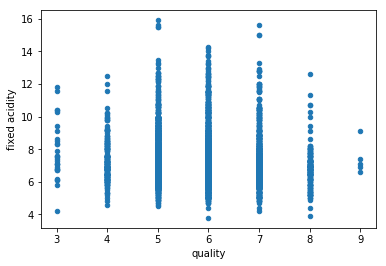

In [134]:
wine_df.plot(x='quality', y='fixed acidity', kind='scatter');

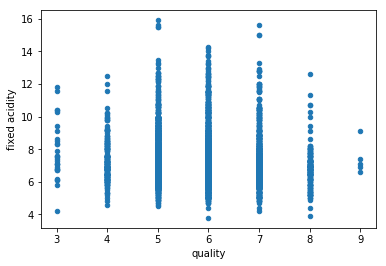

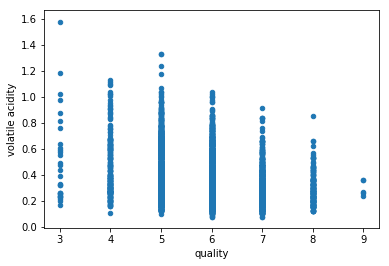

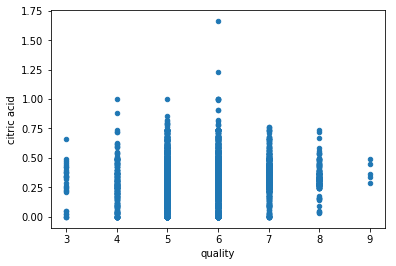

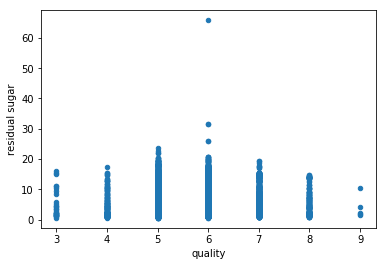

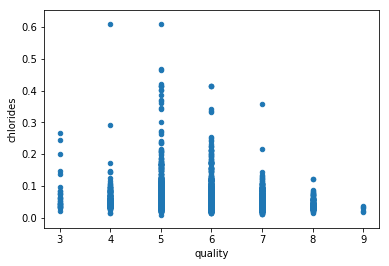

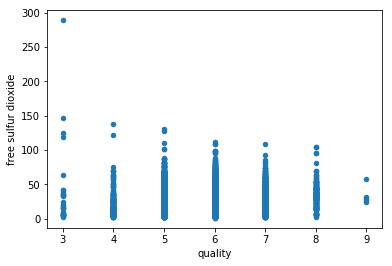

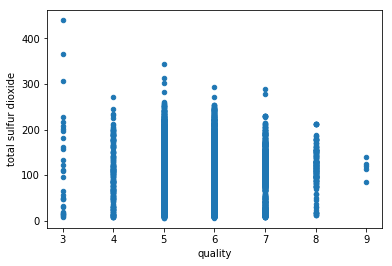

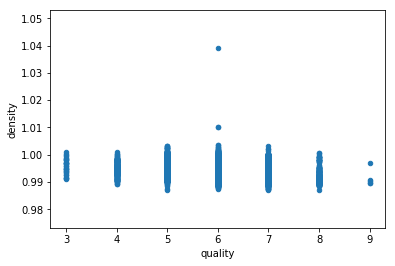

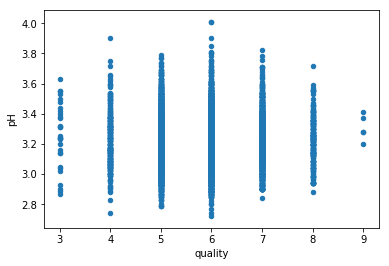

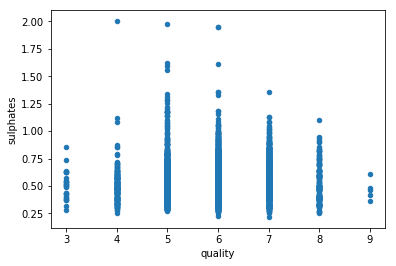

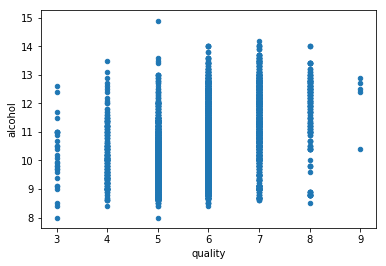

In [135]:
def wine_scater(df, x, y):
        return df.plot(x, y, kind='scatter')

x = 'quality'
y = wine_df.columns[:-2]
# 通过print(wine_df.columns)观察列
# 除了最后的quality是自己，color不是数字要排除，其他的都可以比较的
# 所以使用上面的[:-2]表示从开始到倒数第二个元素

for i in y:
    wine_scater(wine_df, x, i)
# 因为y是一个列表，我们就可以用for in将每一个指标循环打印出来了

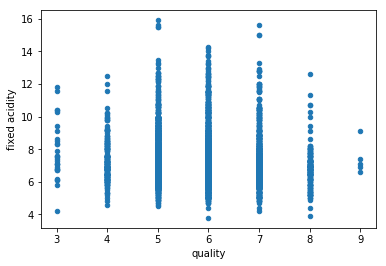

In [136]:
wine_df.plot(x='quality', y='fixed acidity', kind='scatter');

In [137]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [138]:
wine_df.groupby(['quality','color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [139]:
wine_df.groupby(['quality','color'], as_index = False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


In [140]:
wine_df.groupby('color', as_index = False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


### #1: 酒精含量高的酒是否评分较高？
创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。第一个条柱已填充了数据。

In [141]:
aloc_median = wine_df['alcohol'].median()
# 如果使用众数mode的话会相差超多，使用mean还凑合，使用median中位数最好

# 选择酒精含量小于平均值的样本
low_alcohol = wine_df.query('alcohol < {}'.format(aloc_median))
# low_alcohol = wine_df.query('alcohol < 10.3')
# 不要用上面这种方式把median写进去，如果数据变了就要改程序了
# week2中的有讲格式化字符串，可以传入变量的

# 选择酒精含量大于等于平均值的样本
high_alcohol = wine_df.query('alcohol >= {}'.format(aloc_median))

# 确保这些查询中的每个样本只出现一次
print(low_alcohol.shape[0])
print(high_alcohol.shape[0])
wine_df.shape[0] == low_alcohol.shape[0] \
+ high_alcohol.shape[0]
# 左边是全数据量，右边是拆分后的数据量和
# 也顺便检查下两个分组的数量

3177
3320


True

In [142]:
# 回答问题
# 这次问题的回答使用query方法
mean_quality_high = high_alcohol['quality'].mean()
mean_quality_low = low_alcohol['quality'].mean()
print(mean_quality_high)
print(mean_quality_low)

6.146084337349397
5.475920679886686


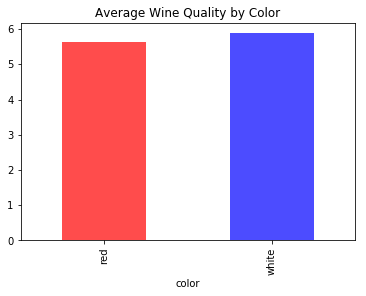

In [143]:
wine_df.groupby('color')['quality'].mean() \
.plot(kind='bar', 
      title='Average Wine Quality by Color', 
      color = ['red', 'blue'], alpha = .7);
# .plot开始就是把前面按照color筛选出来的数值画图了
# title是标题
# color是颜色
# alpha是透明度

Text(0,0.5,'Quality')

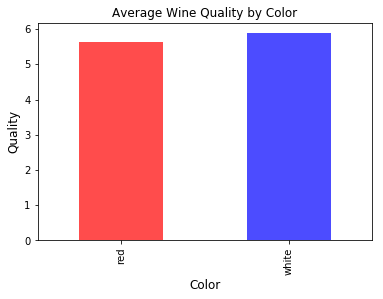

In [144]:
# 接下来我们要美化一下（美颜相机了解一下？）
# 在文档前面加上import matplotlib.pyplot as plt
# 这种方式是把matplotlib第三方库众的pyplot模块引入
# 有时候库内容很多这样可以只引入库中需要的部分
# 这个模块是要定义图形x和y轴时候要用的pandas中并没有集成这个功能
# 一同引入的还有seaborn


wine_df.groupby('color')['quality'].mean() \
.plot(kind='bar', 
      title='Average Wine Quality by Color', 
      color = ['red', 'blue'], alpha = .7);

plt.xlabel('Color', fontsize=12)
plt.ylabel('Quality', fontsize=12)
# 有了这两行就可以看到两个轴的标签了
# 注意这两行要放在最下面，因为plot会输出xlabel所以要在最后覆盖一下

Text(0.5,1,'Counts by Wine Color and Quality')

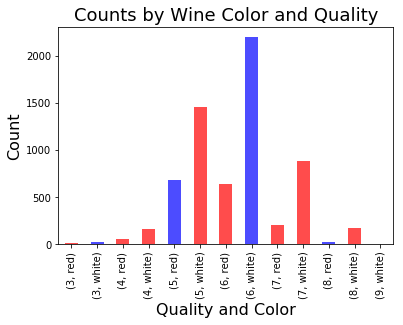

In [145]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
# 随便选了pH列，可以写循环输出所有的
counts.plot(kind='bar', color = ['red', 'blue'], alpha = .7)
plt.xlabel('Quality and Color', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Counts by Wine Color and Quality', fontsize = 18)
# 我把title也拆出来了为了能够指定大小，这样plot也比较短
# 此处的color是为了好看，没有区分意义

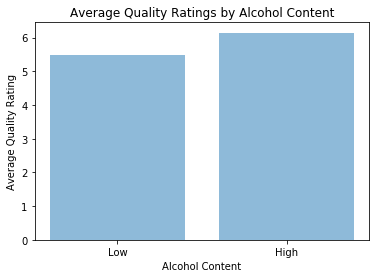

In [146]:
# class中给出的另一种画图的方法（看懂就好）
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels,alpha = .5)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');
# 教室中给出的酒精对比的答案，打不开的可以参考

In [147]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### #2: 口感较甜的酒是否评分较高？
创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [148]:
sugar = wine_df['residual sugar'].mode()[0]
# 求出众数

# 打断一下，下面这句会报错的
# low = wine_df.query('residual sugar<{}'.format(sugar))
# 因为在query的时候 residual sugar两个词中的空格会造成问题
# 正确的方法是把列名转换一下再做
# 先看下列名
wine_df.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color


In [149]:
# 那么先转换列名（将在案例2中有详细说明）
# 此段不用看知道是转换列名就好，看到了一个map的方法记录下
cols = wine_df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
# map是把后面（）中的内容分别对cols列表中的每个元素执行一下
wine_df.columns = cols
wine_df.head(0)
# check一下已经OK了

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color


In [150]:
# 接下来继续先把sugar的平均求出来，再分割成高和低
sugar = wine_df['residual_sugar'].mean()
# sugar = wine_df['residual_sugar'].mode()[0]
# 使用mode不一定能比较平均的区分开数据
low = wine_df.query('residual_sugar<{}'.format(sugar))
high = wine_df.query('residual_sugar>={}'.format(sugar))

low_sugar = low['quality'].mean()
high_sugar = high['quality'].mean()
# 如果用这两个画图的话我们就很难看出区别来了，区别在小数位
# 那么我们可以用统一减去一个值的方式让对比明显
# 不过这个做法有时候会有迷惑性

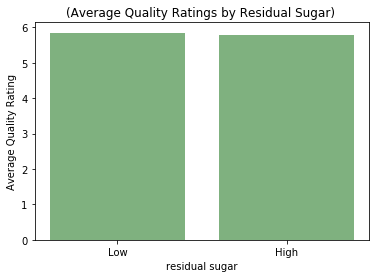

In [151]:
# 图1，不做调整（请和图2对比）
locations = [1, 2]
heights = [low_sugar, high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels,color = 'Darkgreen',alpha = .5)
plt.title('(Average Quality Ratings by Residual Sugar) ')
plt.xlabel('residual sugar')
plt.ylabel('Average Quality Rating');

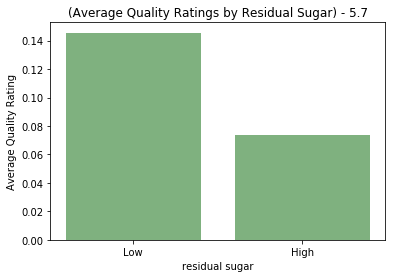

In [152]:
# 图2，做了调整用合适的标签创建柱状图

low_sugar = low['quality'].mean()-5.7
high_sugar = high['quality'].mean()-5.7
# 5.7是自己定的，也可以使用mean什么的做个加权

locations = [1, 2]
heights = [low_sugar, high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels,color = 'Darkgreen',alpha = .5)
plt.title('(Average Quality Ratings by Residual Sugar) - 5.7')
plt.xlabel('residual sugar')
plt.ylabel('Average Quality Rating');

### #3: 哪个酸度水平的平均评分最高？
创建柱状图，四个酸度水平分别用一个条柱表示。

In [153]:
wine_df.head(1)
# 先检查下，愿数据中没有酸度水平这个数据，但是有PH，我们自己做一列吧

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [161]:
wine_df['pH'].describe()
# 其实我看describe这个输出已经把值做了区间分割了

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [154]:
# 思路就是根据PH值的划分，分为4个酸度水平
# 将min到max的5个值用做“分割”点
bin_edges = [2.72,3.11,3.21,3.32,4.01] 

# 当然也可以偷懒了，先确定要的5个是describe输出的倒数5个，用[3:]选中
# 因为是series结构（有min ： 2.72这种对应关系）
# 所以用list把输出的value（就是2.72这些值）输出成列表
bin_edges_smart = list(wine_df['pH'].describe()[3:].values)

#检查下，完美
print(bin_edges_smart)

[2.72, 3.11, 3.21, 3.32, 4.01]


In [155]:
# 接下来对每个酸度水平类别进行命名
bin_names = ['H','MH','M','L'] 

# 之后就可以创建 acidity_levels 列了
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
# 这里注意cut方法的3个参数用法第一个参数是要比较的列

wine_df.groupby(['acidity_levels'])['quality'].mean()

acidity_levels
H     5.783343
MH    5.784540
M     5.850832
L     5.859593
Name: quality, dtype: float64

In [157]:
wine_df.head(1)
# 检查下数据列OK了，可以继续分析了

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,L
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,MH
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,M
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,MH
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,L


In [199]:
datared = wine_df.query('color == "red"')

In [203]:
datared = wine_df.query('color == "red"').groupby(['acidity_levels'])['quality'].mean()-5
# 为了看出来区别，data减5，示例行为，在实际工作中要权衡
datared

acidity_levels
H     0.692308
MH    0.676157
M     0.670429
L     0.588798
Name: quality, dtype: float64

In [205]:
datawhite = wine_df.query('color == "white"').groupby(['acidity_levels'])['quality'].mean()-5
# 为了看出来区别，data减5，示例行为，在实际工作中要权衡
datawhite

acidity_levels
H     0.791614
MH    0.806902
M     0.922252
L     1.095012
Name: quality, dtype: float64

In [187]:
data = wine_df.groupby(['acidity_levels','color'])['quality'].mean()-5
# 为了看出来区别，data减5，示例行为，在实际工作中要权衡
data

acidity_levels  color
H               red      0.692308
                white    0.791614
MH              red      0.676157
                white    0.806902
M               red      0.670429
                white    0.922252
L               red      0.588798
                white    1.095012
Name: quality, dtype: float64

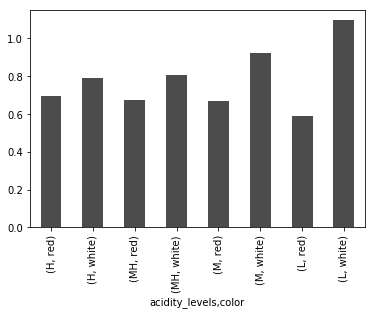

In [188]:
data.plot(kind = 'bar', color = 'k', alpha = 0.7)
# 用列表传入多个color的话会自动区分，不是特别稳定

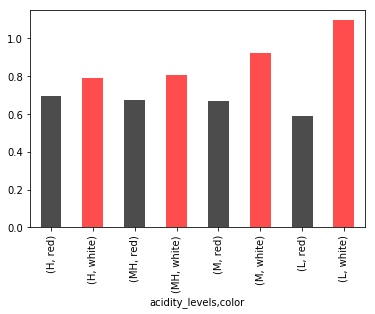

In [189]:
data.plot(kind = 'bar', color = ['k','r','k','r','k','r','k','r'], alpha = 0.7)
# 可以按列指定，也可以使用别的方式生成这个颜色列表

In [ ]:
# plus 美化一下
- 开始想的是使用重叠的方式，结果显示的很难看，再找别的方法
- 之后差了一下，bar的位置是可以微调的，于是又了第二个方法

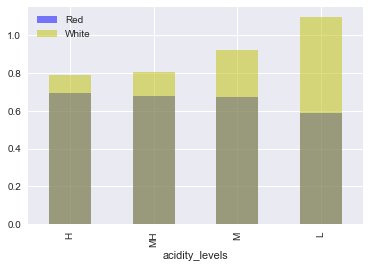

In [273]:
# plus1
datared.plot(kind = 'bar', color = ['b'], alpha = 0.5, label = 'Red')
# 可以按列指定，也可以使用别的方式生成这个颜色列表
datawhite.plot(kind = 'bar', color = ['y'], alpha = 0.5, label = 'White')
sns.set(context = 'notebook', style = 'darkgrid')
# 新版本的sns不会自己美化，需要上面这句设定底色
plt.legend(loc = 'best')

In [302]:
len(datared)
datared

acidity_levels
H     0.692308
MH    0.676157
M     0.670429
L     0.588798
Name: quality, dtype: float64

Text(0.5,0.98,'pH Levels Bar by Colors')

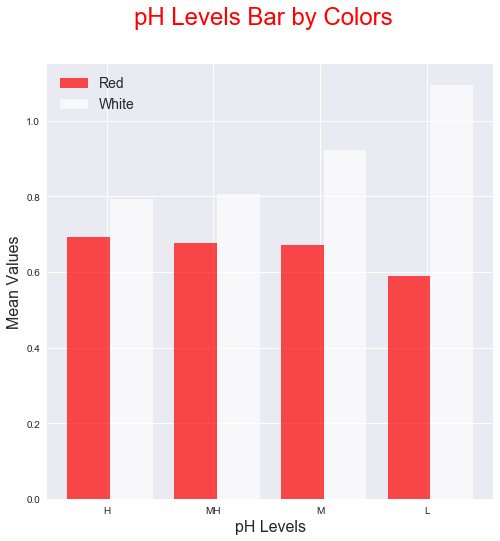

In [320]:
# plus2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(datared))
# 要想微调位置要设置个变量ind
w = 0.4
# bar的宽度也是可以设定的
ax.bar(ind, datared, color = 'r', alpha = 0.7, width = w, label = 'Red')
ax.bar(ind+w, datawhite, color = 'w', alpha = 0.7, width = w, label = 'White')
#ind是bar的位置，datared是输入的数据，后面都一样的，多个width是bar的宽度
ax.legend(loc = 'best', fontsize = 14)
ax.set_xticks(ind+width/3)
# 设定x轴标签位置，考虑到red+white+两边留白
# 测试了下ind+width/3位置最好
ax.set_xticklabels(datared.index)
# 将分类标签作为x标签
ax.set_ylabel('Mean Values', fontsize = 16)
ax.set_xlabel('pH Levels', fontsize = 16)
fig.suptitle('pH Levels Bar by Colors', fontsize = 24, color = 'red')
# 这个图是从stack参考来的
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars